# 2-1 결측치 처리

### 결측치 확인

In [3]:
from pandas import read_csv
import numpy as np
wine = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/2-1_wine.csv', index_col=0).filter(['Alcohol', 'Malicacid', 'Ash', 'Magnesium', 'Hue']) #일부 특징만 사용
wine.head()
print("**원본 데이터:\n", wine.isna().sum())

**원본 데이터:
 Alcohol      0
Malicacid    0
Ash          0
Magnesium    0
Hue          0
dtype: int64


In [ ]:
# 결측치가 없으므로 두 개의 컬럼 Alcohol과 Ash에 임의로 결측치를 입력
from numpy.random import randint
wine_m = wine.copy()
for col in ['Alcohol', 'Ash']:
    random_idx = randint(0, len(wine), 25)  # 25개 숫자를 랜덤으로 뽑음 : array([ 12, 87, 203, 55, ..., 140 ])
    wine_m.loc[random_idx, col] = np.nan
print("\n**결측치 생성 데이터:\n", wine_m.isna().sum())


**결측치 생성 데이터:
 Alcohol      24
Malicacid     0
Ash          22
Magnesium     0
Hue           0
dtype: int64


In [7]:
!pip install missingno


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


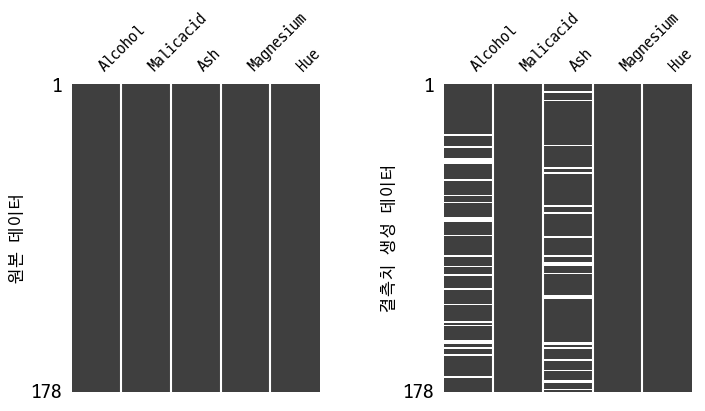

In [8]:
# plotting 환경 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["font.family"] = 'D2Coding' #PC에 설치된 글꼴 사용
plt.rcParams["font.size"] = 12
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(1,2, figsize=(8,4))
plt.subplots_adjust(wspace=0.5)

import missingno as msno
msno.matrix(df = wine, figsize=(5,5), fontsize=12, ax=ax[0], sparkline=False)
ax[0].set_ylabel('원본 데이터')

msno.matrix(df = wine_m, figsize=(5,5), fontsize=12, ax=ax[1], sparkline=False)
ax[1].set_ylabel('결측치 생성 데이터')

plt.show()

### Zero imputation & Constant imputation : fillna
- 결측값을 0이나 특정 상수로 대체 

In [ ]:
# 대치 전 : wine_m
wine_m[['Alcohol', 'Ash']].head(10)

,Alcohol,Ash
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,NaN
5,14.20,2.45
6,14.39,2.45
7,14.06,2.61
8,14.83,2.17
9,13.86,NaN


In [10]:
# 0으로 대치 후 wine_imp
wine_imp = wine_m.fillna(0)
wine_imp.head(10)

,Alcohol,Malicacid,Ash,Magnesium,Hue
0,14.23,1.71,2.43,127,1.04
1,13.20,1.78,2.14,100,1.05
2,13.16,2.36,2.67,101,1.03
3,14.37,1.95,2.50,113,0.86
4,13.24,2.59,0.00,118,1.04
5,14.20,1.76,2.45,112,1.05
6,14.39,1.87,2.45,96,1.02
7,14.06,2.15,2.61,121,1.06
8,14.83,1.64,2.17,97,1.08
9,13.86,1.35,0.00,98,1.01


In [11]:
# 1000으로 대치 후 wine_imp
wine_imp = wine_m.fillna(1000)
wine_imp.head(10)

,Alcohol,Malicacid,Ash,Magnesium,Hue
0,14.23,1.71,2.43,127,1.04
1,13.20,1.78,2.14,100,1.05
2,13.16,2.36,2.67,101,1.03
3,14.37,1.95,2.50,113,0.86
4,13.24,2.59,1000.00,118,1.04
5,14.20,1.76,2.45,112,1.05
6,14.39,1.87,2.45,96,1.02
7,14.06,2.15,2.61,121,1.06
8,14.83,1.64,2.17,97,1.08
9,13.86,1.35,1000.00,98,1.01


### 대푯값으로 채우는 방법
- 해당 변수의 결측 되지 않은 다른 값들로 구한 평균값, 중앙값, 최빈값 등의 대푯값으로 결측치를 대치하는 방법
- 로그 변환 등을 통해 치우침이 적은 분포로 데이터를 변환한 후 대푯값을 구해 대치하기도 한다.

In [12]:
# 대푯값으로 채우기 전: wine_m
print(wine_m[['Alcohol', 'Ash']].head(10))

   Alcohol   Ash
0    14.23  2.43
1    13.20  2.14
2    13.16  2.67
3    14.37  2.50
4    13.24   NaN
5    14.20  2.45
6    14.39  2.45
7    14.06  2.61
8    14.83  2.17
9    13.86   NaN


In [ ]:
# 결측치를 대푯값 'mean'으로 대치한 데이터셋: wine_imp1
from sklearn.impute import SimpleImputer
from pandas import DataFrame
